In [1]:
using LinearAlgebra
using Plots; gr()
using LaTeXStrings

# Quiz 1 - Relativistic Quantum Mechanics 

---

En este trabajo se resolverá numericamente por el metodo de diferencias finitas la ecuación de dirac 1D + 1T, esto se hará reduciendo esta a la ecuación de Klein Gordon (esto gracias a que ya se demostró que los spinores de Dirac satisfacen esta ultima):

$$ (-\hbar^2c^2\nabla^2 + m^2c^4)\psi = h^2\frac{\partial^2 \psi}{\partial t^2}$$

Para resolverla propondremos una separación de variables tal que: $ \psi(x,t) = \phi(x)\tau(t) $, por lo tanto:

$$ [-\hbar^2c^2\nabla^2 + m^2c^4]\phi(x)\tau(t) = h^2\frac{\partial^2 \phi(x)\tau(t)}{\partial t^2} $$

Si operamos:

$$ -\hbar^2c^2\tau(t)\nabla^2\phi(x)+ m^2c^4\phi(x)\tau(t) = h^2\phi(x)\frac{\partial^2 \tau(t)}{\partial t^2} $$

Al final nos quedara que, la ecuacion de klein grodon (espacial) bajo un potencial $U(x) = U_0$ será:

$$ [(E-U_0)^2]\phi(x) = (m^2c^4 - \hbar^2c^2\nabla^2)\phi(x) $$

Y si trabajamos en unidades naturales nos quedara la siguiente ecuación:

$$ [(E-U_0)^2 - m^2]\phi(x) = -\frac{d^2 \phi(x)}{d x^2} $$

Por lo tanto, para aplicar el método de diferencias finitas se redefinirá la energía de manera que: $E' = (E -U_0)^2 - m^2$, por lo que la ecuacion que se resolverá numericamente sera:

$$ E'\phi = -\frac{d^2 \phi(x)}{d x^2} $$

---

Para este proposito se utilizaran 4 potenciales diferentes dentro de la caja, los cuales serán:
1. $U_0 = 0$
2. $U_0 = 10^4m_e$
3. $U_0 = m_e$
4. $U_0 = m_e/100$


In [102]:
x = 0:0.005:1  # Numero de puntos que se van a utilizar (ancho de la caja 1-D)
m = 0.511e-3

function KG_eq(n::Int64,potencial::Int64)
    
    global m
    
    U₀ = 0
    # Se selecciona el potencial de interes (0 - 4) -------------------------------------------------------------------------------------------------------------
    if(potencial==1)
        U₀ = 0
    elseif(potencial==2)
        U₀ = 10^3*m
    elseif(potencial==3) 
        U₀ = m
    else()
        U₀ = m/100
    end
    
    # Definimos los parametros necesarios para el metodo -------------------------------------------------------------------------------------------------------
    global x
    N = size(x,1)
    
    
    
    # Se construye la matriz correspondiente a la segunda derivada para el metodo de diferencias finitas -------------------------------------------------------
    Dx = zeros(Float64,N,N)
    for j in 1:N, i in 1:N
        if(i==j) Dx[i,j] = -2
        elseif (abs(i-j) <= 1) Dx[i,j] = 1
        end 
    end
    
    # Se construye la matriz del hamiltoniano ------------------------------------------------------------------------------------------------------------------
    H = zeros(Float64,N,N)
    H = .- Dx
    
    # Se diagonaliza la matriz del hamiltoniano para hallar los autovalores (energias) y los autovectores (autofunciones) --------------------------------------
    val = eigvals(H)
    vec = eigvecs(H)

    E_prime = sort!(val)
    E_prime = E_prime[1:5] # Energias primas
    E = (E_prime .- U₀).^2 .- m^2 #regresamos a la definicion de la energia

    energies = (E./E[1]) # Energias primas "normalizadas"

    return vec[:,n], E
end

KG_eq (generic function with 2 methods)

## Se calculan las diferentes autofunciones y autoenergias para los diferentes potenciales

In [103]:
eigenfunc1, energies1 = KG_eq(1,1)
eigenfunc2, energies2 = KG_eq(1,2)
eigenfunc3, energies3 = KG_eq(1,3)
eigenfunc4, energies4 = KG_eq(1,4)

Energies = [energies1[2],energies2[1],energies3[3],energies4[2]] .* 1.6e-13 #Se seleccionan solo energías positivas

4-element Vector{Float64}:
 1.07969645468055e-19
 4.173977642968422e-14
 4.020485773807786e-19
 1.0639187301177441e-19

In [104]:
for i in 1:4
   print("la energias para el estado base $(i) es: $(Energies[i]) J \n") 
end

la energias para el estado base 1 es: 1.07969645468055e-19 J 
la energias para el estado base 2 es: 4.173977642968422e-14 J 
la energias para el estado base 3 es: 4.020485773807786e-19 J 
la energias para el estado base 4 es: 1.0639187301177441e-19 J 


### Se grafican los resultados

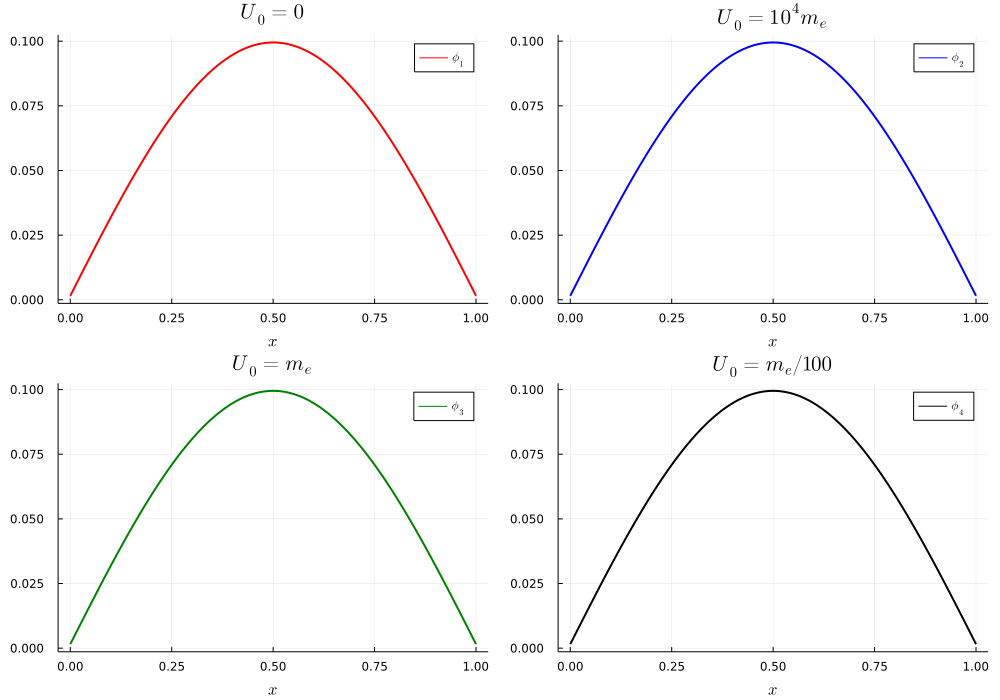

In [105]:
# grafica de las funciones de onda
plot(x,[eigenfunc1,eigenfunc2,eigenfunc3,eigenfunc4],
    layout = 4, size=(1000,700),dpi=400,
    title=[ L"U_0 = 0" L"U_0 = 10^4m_e" L"U_0 = m_e" L"U_0 = m_e/100"],
    label=[ L"\phi_1" L"\phi_2" L"\phi_3" L"\phi_4"],
    xlabel=L"x",
    c = ["red" "blue" "green" "black"],
    lw=2)

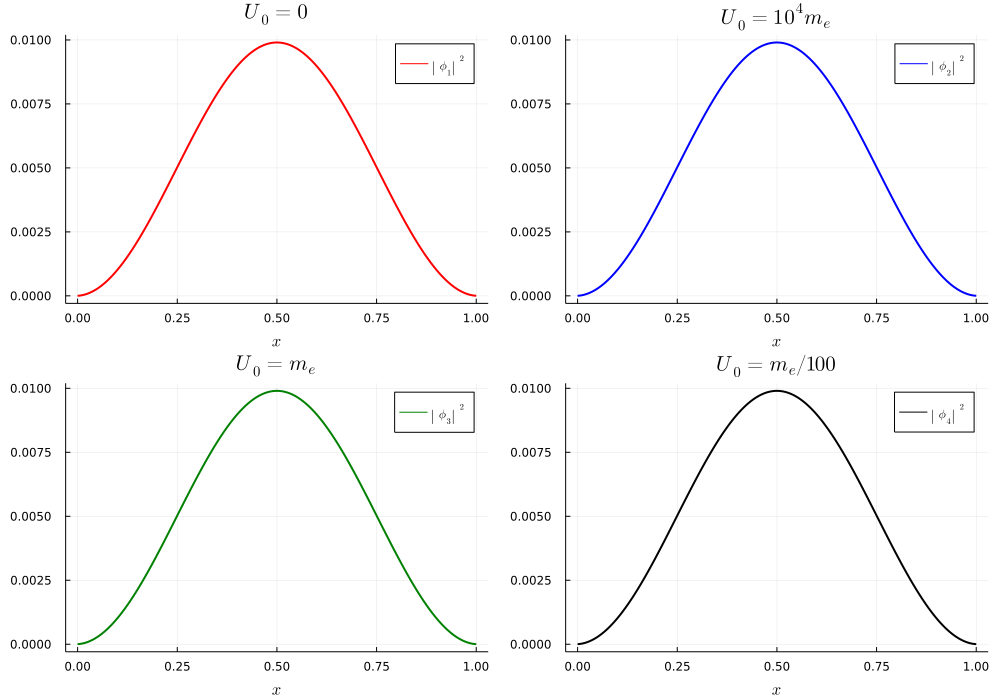

In [106]:
# grafica de las densidades de probabilidad
plot(x,[eigenfunc1.^2,eigenfunc2.^2,eigenfunc3.^2,eigenfunc4.^2],
    layout = 4, size=(1000,700),dpi=400,
    title=[ L"U_0 = 0" L"U_0 = 10^4m_e" L"U_0 = m_e" L"U_0 = m_e/100"],
    label=[ L"\left| \phi_1 \right|^2" L"\left| \phi_2 \right|^2" L"\left| \phi_3 \right|^2" L"\left| \phi_4 \right|^2"],
    xlabel=L"x",
    c = ["red" "blue" "green" "black"],
    lw=2)